In [2]:
import numpy as np
import pandas as pd

In [12]:
import tensorflow as tf


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File 

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [6]:
train_1 = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_emoticon.csv')
# train_2 = pd.read_csv('/Users/trijalsrivastava/Code/ML/CS771/mini-project-1/datasets/train/train_emoticon.csv')

In [7]:
train_1.head()

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1


In [9]:
data = np.load("/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_feature.npz")


In [10]:
data.files

['features', 'label']

In [11]:
path = tf.keras.utils.get_file('train_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_feature.npz')
with np.load(path) as data:
  train_examples = data['features']
  train_labels = data['label']

NameError: name 'tf' is not defined

In [9]:
path = tf.keras.utils.get_file('valid_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1/datasets/valid/valid_feature.npz')
with np.load(path) as data:
  valid_examples = data['features']
  valid_labels = data['label']

In [4]:
print(train_examples.shape, train_labels.shape)
print(valid_examples.shape, valid_labels.shape)

train_examples = np.asarray(train_examples, dtype=np.float32)
train_labels = np.asarray(train_labels, dtype=np.int32)
valid_examples = np.asarray(valid_examples, dtype=np.float32)
valid_labels = np.asarray(valid_labels, dtype=np.int32)

# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((valid_examples, valid_labels))
print(type(train_examples), type(train_labels))
print(type(train_examples[0]), type(train_labels[0]))



NameError: name 'train_examples' is not defined

## Using basic RF classifier and 100% dataset 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Flatten the input (since models like RandomForest expect 2D input)
train_examples_flat = train_examples.reshape(train_examples.shape[0], -1)
valid_examples_flat = valid_examples.reshape(valid_examples.shape[0], -1)


clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(train_examples_flat, train_labels)
y_pred = clf.predict(valid_examples_flat)
print("Accuracy:", accuracy_score(valid_labels, y_pred))


Accuracy: 0.9243353783231084


In [14]:
# Access the first decision tree in the forest
tree_1 = clf.estimators_[0]


In [15]:
tree_1

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=209652396)

## Using partial dataset now 80% then 70% then 60% then 50%

In [25]:
from sklearn.model_selection import train_test_split

train_examples_80, train_examples_20, train_labels_80, train_labels_20 = train_test_split( train_examples_flat, train_labels, test_size=0.2, random_state=42)
train_examples_70, train_examples_30, train_labels_70, train_labels_30 = train_test_split( train_examples_flat, train_labels, test_size=0.3, random_state=42)
train_examples_60, train_examples_40, train_labels_60, train_labels_40 = train_test_split( train_examples_flat, train_labels, test_size=0.4, random_state=42)
train_examples_50, train_examples_50, train_labels_50, train_labels_50 = train_test_split( train_examples_flat, train_labels, test_size=0.5, random_state=42)

In [30]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(train_examples_flat, train_labels)
y_pred = clf.predict(valid_examples_flat)
print("Accuracy with 100%:", accuracy_score(valid_labels, y_pred))

Accuracy with 100%: 0.9243353783231084


In [31]:

clf_1 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_1.fit(train_examples_80, train_labels_80)
y_pred = clf_1.predict(valid_examples_flat)
print("Accuracy with 80%:", accuracy_score(valid_labels, y_pred))


Accuracy with 80%: 0.9386503067484663


In [32]:
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_2.fit(train_examples_70, train_labels_70)
y_pred = clf_2.predict(valid_examples_flat)
print("Accuracy with 70%:", accuracy_score(valid_labels, y_pred))


Accuracy with 70%: 0.9304703476482618


In [33]:
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_3.fit(train_examples_60, train_labels_60)
y_pred = clf_3.predict(valid_examples_flat)
print("Accuracy with 60%:", accuracy_score(valid_labels, y_pred))

Accuracy with 60%: 0.9304703476482618


In [34]:
clf_4 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_4.fit(train_examples_50, train_labels_50)
y_pred = clf_4.predict(valid_examples_flat)
print("Accuracy with 50%:", accuracy_score(valid_labels, y_pred))

Accuracy with 50%: 0.9243353783231084


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(train_examples_flat)
valid_pca = pca.fit_transform(valid_examples_flat)

# tsne = TSNE(n_components=2)
# tsne_result = tsne.fit_transform(train_examples_flat)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='coolwarm', s=5, label='Train')
#plt.scatter(valid_pca[:, 0], valid_pca[:, 1], c=valid_labels, cmap='viridis', s=5, label='Valid')
plt.title('Data Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


NameError: name 'train_examples_flat' is not defined

SVM Accuracy on Test Data: 41.51%


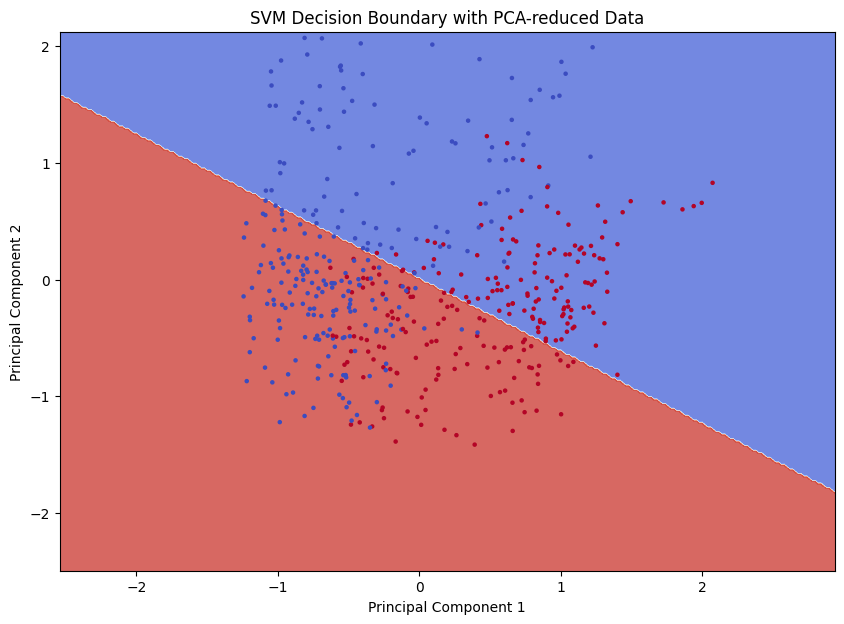

In [22]:
from sklearn.svm import SVC
 
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(train_examples_flat)
valid_pca = pca.fit_transform(valid_examples_flat)

# X_train, X_test, y_train, y_test = train_test_split(pca_result, train_labels, test_size=0.3, random_state=42)
svm_classifier = SVC(kernel='poly',degree=1)  # Using a linear kernel for simplicity
svm_classifier.fit(pca_result, train_labels)
y_pred = svm_classifier.predict(valid_pca)
accuracy = accuracy_score(valid_labels, y_pred)
print(f"SVM Accuracy on Test Data: {accuracy * 100:.2f}%")


h = .02  # Step size in the mesh
x_min, x_max = pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1
y_min, y_max = pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary by predicting for each point in the mesh
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 7: Plot the PCA components and the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # Plot decision boundary
# plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='coolwarm', edgecolors='k', s=20)  # Plot data points
plt.scatter(valid_pca[:, 0], valid_pca[:, 1], c=valid_labels, cmap='coolwarm', s=5, label='Valid')
plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [21]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout

input_shape = (13, 768)

 
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(GlobalMaxPooling1D())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


history = model.fit(train_examples, train_labels, epochs=10, batch_size=32, validation_data=(valid_examples, valid_labels))

# Evaluate the model
score = model.evaluate(valid_examples, valid_labels)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 11, 128)        │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303,361 (1.16 MB)

 Trainable params: 303,361 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6660 - loss: 0.5967 - val_accuracy: 0.9039 - val_loss: 0.2747
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9028 - loss: 0.2513 - val_accuracy: 0.9468 - val_loss: 0.1356
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9353 - loss: 0.1621 - val_accuracy: 0.9591 - val_loss: 0.1084
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9476 - loss: 0.1292 - val_accuracy: 0.9427 - val_loss: 0.1305
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9487 - loss: 0.1169 - val_accuracy: 0.9530 - val_loss: 0.0980
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9487 - loss: 0.1141 - val_accuracy: 0.9775 - val_loss: 0.0707
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9482 - loss: 0.1182 - val_accuracy: 0.9836 - val_loss: 0.0552
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9633 - loss: 0.0850 - val_accuracy: 0.

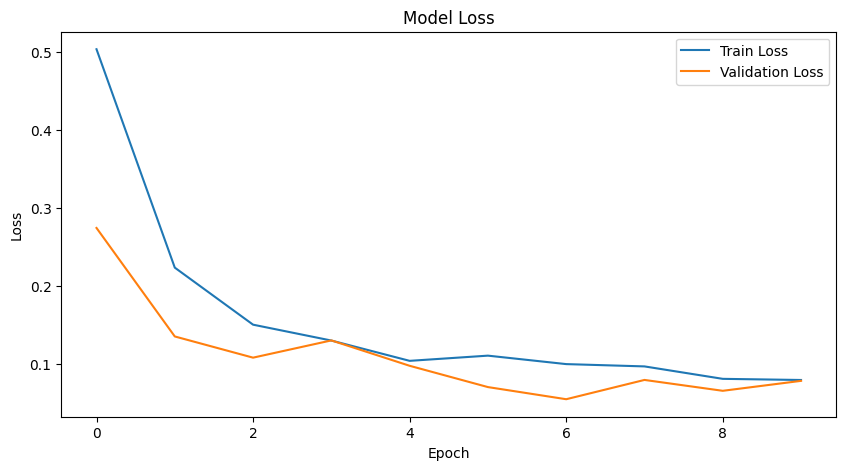

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()